<a href="https://colab.research.google.com/github/vlsantos-bit/Teste-Radar/blob/master/Grib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install python-grib
!sudo python setup.py install
!sudo apt-get install libgeos-dev
!sudo pip3 install -U git+https://github.com/matplotlib/basemap.git


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  libeccodes-data libeccodes-dev libeccodes0 libgrib2c-dev libgrib2c0d
  python-grib-doc python-pyproj python3-grib python3-pyproj
The following NEW packages will be installed:
  libeccodes-data libeccodes-dev libeccodes0 libgrib2c-dev libgrib2c0d
  python-grib python-grib-doc python-pyproj python3-grib python3-pyproj
0 upgraded, 10 newly installed, 0 to remove and 7 not upgraded.
Need to get 24.4 MB of archives.
After this operation, 122 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libeccodes-data all 2.6.0-2 [1,260 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libeccodes0 amd64 2.6.0-2 [1,601 kB]
Get:3 http://archive.ubuntu.

In [0]:
import pygrib
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.basemap import shiftgrid
import matplotlib.pyplot as plt
import numpy as np

In [3]:
!wget https://nomads.ncdc.noaa.gov/data/gfsanl/202001/20200118/gfsanl_3_20200118_0600_006.grb2

--2020-01-21 21:10:40--  https://nomads.ncdc.noaa.gov/data/gfsanl/202001/20200118/gfsanl_3_20200118_0600_006.grb2
Resolving nomads.ncdc.noaa.gov (nomads.ncdc.noaa.gov)... 205.167.25.166, 2610:20:8040:2::166
Connecting to nomads.ncdc.noaa.gov (nomads.ncdc.noaa.gov)|205.167.25.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27747235 (26M) [text/plain]
Saving to: ‘gfsanl_3_20200118_0600_006.grb2’

gfsanl_3_20200118_0 100%[===================>]  26.46M  8.15MB/s    in 3.2s    

2020-01-21 21:10:44 (8.15 MB/s) - ‘gfsanl_3_20200118_0600_006.grb2’ saved [27747235/27747235]



In [4]:
!unzip master.zip

unzip:  cannot find or open master.zip, master.zip.zip or master.zip.ZIP.


In [0]:
grib = ('gfsanl_3_20200118_0600_006.grb2');
gr = pygrib.open(grib)


In [6]:
#Mostrar o inventório

for g in gr:
    print(g)

1:Cloud mixing ratio:kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 6 hrs:from 202001180600
2:Ice water mixing ratio:kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 6 hrs:from 202001180600
3:Rain mixing ratio:kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 6 hrs:from 202001180600
4:Snow mixing ratio:kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 6 hrs:from 202001180600
5:Graupel (snow pellets):kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 6 hrs:from 202001180600
6:Maximum/Composite radar reflectivity:dB (instant):regular_ll:atmosphere:level 0 -:fcst time 6 hrs:from 202001180600
7:Visibility:m (instant):regular_ll:surface:level 0:fcst time 6 hrs:from 202001180600
8:U component of wind:m s**-1 (instant):regular_ll:unknown:level 0:fcst time 6 hrs:from 202001180600
9:V component of wind:m s**-1 (instant):regular_ll:unknown:level 0:fcst time 6 hrs:from 202001180600
10:Ventilation Rate:m**2 s**-1 (instant):regular_ll:unknown:level 0:fcst time 6 hrs

In [0]:
dado = gr[421]

In [9]:
temp_vals = dado.values
print(temp_vals)


[[98495.76  98495.76  98495.76  ... 98495.76  98495.76  98495.76 ]
 [98738.96  98740.555 98743.76  ... 98730.96  98732.555 98735.76 ]
 [99026.96  99030.16  99031.76  ... 99018.96  99022.16  99025.36 ]
 ...
 [70849.36  70793.36  70735.76  ... 70988.555 70945.36  70902.16 ]
 [70217.36  70199.76  70177.36  ... 70274.96  70255.76  70236.555]
 [69503.76  69503.76  69503.76  ... 69503.76  69503.76  69503.76 ]]


In [25]:
grb = gr.select(name='Surface pressure')[0]

data, lats, lons = grb.data(lat1=-35,lat2=-25,lon1=302,lon2=315)
print(grb)




421:Surface pressure:Pa (instant):regular_ll:surface:level 0:fcst time 6 hrs:from 202001180600


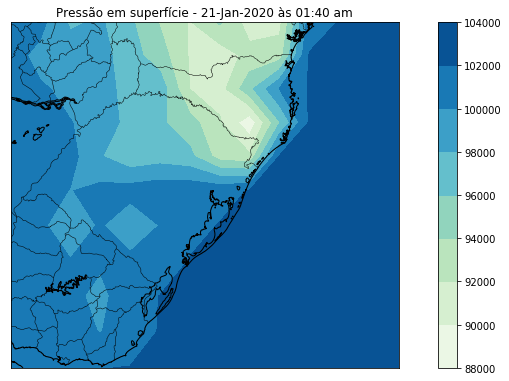

In [50]:

#Função Basemap, plotar a projeção, o recorte das latitude e longitude e definir a resolução da imagem.

m = Basemap(projection='merc',llcrnrlat=-35,urcrnrlat=-25,\
            llcrnrlon=302,urcrnrlon=315,resolution='f')

#Função Matplotlib para definir o tamanho da figura.
plt.figure(figsize=(8,10))

#Inserindo os lat e lon a figura criada pelo Basemap e vinculando às variavéis  x e y
x, y = m(lons, lats)

#Função do Basemap para iserir ao mapa continentes, países e estados.
m.drawcoastlines()
m.drawcountries()
m.drawstates()

#Função do Basemap para realizar a interpolação e criação de polígonos
contourf = m.contourf(x, y, np.squeeze(data),cmap='GnBu')
m.colorbar(contourf, location='right', pad="10%")
#Inserir titulo a imagem 
plt.title('Pressão em superfície - 21-Jan-2020 às 01:40 am')

#Plotar imagem
plt.show()



In [0]:
#######################Altura Geopotencial###################################
grb1 = gr.select(name='Geopotential Height')[3]

data, lats, lons = grb1.data(lat1=-35,lat2=-25,lon1=302,lon2=315)
print(grb1)

gh = grb1.values
print(gh)

24:Geopotential Height:gpm (instant):regular_ll:isobaricInhPa:level 500 Pa:fcst time 0 hrs:from 201906120000
[[37089.96  37089.96  37089.96  ... 37089.96  37089.96  37089.96 ]
 [37088.2   37088.2   37088.2   ... 37088.2   37088.2   37088.2  ]
 [37085.    37085.    37085.    ... 37085.32  37085.16  37085.16 ]
 ...
 [31313.959 31313.16  31312.2   ... 31316.84  31315.879 31314.92 ]
 [31349.318 31348.68  31348.36  ... 31350.76  31350.28  31349.799]
 [31388.52  31388.52  31388.52  ... 31388.52  31388.52  31388.52 ]]


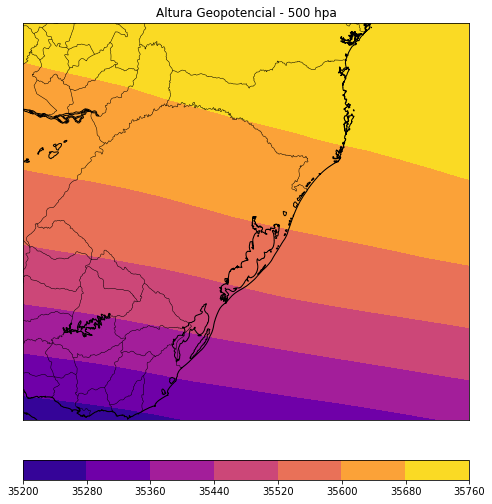

In [0]:
m = Basemap(projection='merc',llcrnrlat=-35,urcrnrlat=-25,\
            llcrnrlon=302,urcrnrlon=315,resolution='f')

plt.figure(figsize=(8,10))

x, y = m(lons, lats)

m.drawcoastlines()
m.drawcountries()
m.drawstates()

contourf1 = m.contourf(x, y, np.squeeze(data),cmap='plasma')
m.colorbar(contourf1, location='bottom', pad="10%")


plt.title('Altura Geopotencial - 500 hpa')
plt.show()

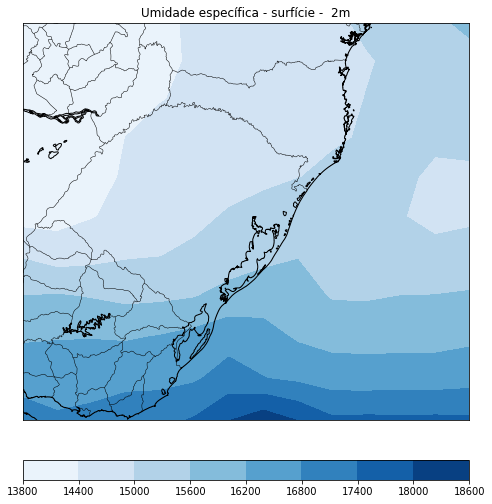

In [0]:
m = Basemap(projection='merc',llcrnrlat=-35,urcrnrlat=-25,\
            llcrnrlon=302,urcrnrlon=315,resolution='f')

plt.figure(figsize=(8,10))

x, y = m(lons, lats)

m.drawcoastlines()
m.drawcountries()
m.drawstates()

contourf2 = m.contourf(x, y, np.squeeze(data),cmap='Blues')
m.colorbar(contourf2, location='bottom', pad="10%")


plt.title('Umidade específica - surfície -  2m')
plt.show()

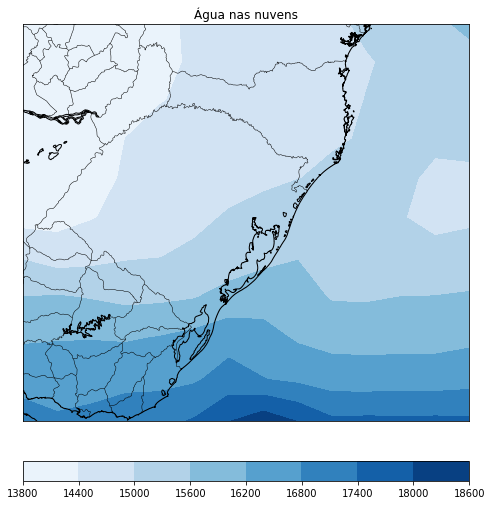

In [0]:
m = Basemap(projection='merc',llcrnrlat=-35,urcrnrlat=-25,\
            llcrnrlon=302,urcrnrlon=315,resolution='f')

plt.figure(figsize=(8,10))

x, y = m(lons, lats)

m.drawcoastlines()
m.drawcountries()
m.drawstates()

contourf3 = m.contourf(x, y, np.squeeze(data),cmap='Blues')
m.colorbar(contourf3, location='bottom', pad="10%")


plt.title('Água nas nuvens')
plt.show()